In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from utility_functions import load_smart_home_spending
from utility_functions import bass_model

In [28]:
# Define the file path
file_path = "data/statistic_id693303_consumer_smart_home_spending_worldwide_2015_2025.xlsx"

df = load_smart_home_spending(file_path=file_path)
df

,Year,Customer Spending
0,2015,51.0
1,2016,61.0
2,2017,74.0
3,2018,83.0
4,2019,95.0
5,2020,86.0


In [38]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_bass_model(df: pd.DataFrame):
    """
    Fits the Bass Diffusion Model to the given data and plots the diffusion curve.
    Also provides predictions for the next three years.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'Year' and 'Customer Spending'.
    """
    # Normalize the year
    df["Year"] = df["Year"] - df["Year"].min()
    
    # Prepare data for curve fitting
    t_values = df["Year"].values
    adoption_values = df["Customer Spending"].values
    
    # Initial guesses for p, q, and M
    initial_guess = [0.01, 0.1, max(adoption_values) * 2]
    
    # Fit the Bass model using non-linear least squares
    params, _ = curve_fit(bass_model, t_values, adoption_values, p0=initial_guess, maxfev=10000)
    
    # Extract estimated parameters
    p_est, q_est, M_est = params
    
    # Predict values using the fitted model
    t_pred = np.arange(0, max(t_values) + 4)  # Extending by three steps for prediction
    adoption_pred = bass_model(t_pred, p_est, q_est, M_est)
    
    # Predictions for the next 3 years
    future_years = t_pred[-3:]
    future_predictions = adoption_pred[-3:]
    print("Predictions for the next 3 years:")
    for year, pred in zip(future_years, future_predictions):
        print(f"Year {year}: {pred:.2f}")
    
    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.scatter(t_values, adoption_values, label="Actual Data", color="blue")
    plt.plot(t_values, adoption_values, linestyle="-", color="blue")  # Line connecting actual data
    plt.plot(t_pred, adoption_pred, label="Bass Model Fit", color="red")
    plt.scatter(future_years, future_predictions, label="Future Predictions", color="green", marker="X")
    plt.xlabel("Year (Normalized)")
    plt.ylabel("Customer Spending")
    plt.title("Bass Diffusion Model Fit with Future Predictions")
    plt.legend()
    plt.grid()

    # Save the plot as a PNG file
    # plt.savefig("bass_model_plot.png", dpi=300, bbox_inches="tight")
    
    plt.show()
    
    # Print estimated parameters
    print(f"Estimated Parameters:")
    print(f"p (Coefficient of Innovation): {p_est:.4f}")
    print(f"q (Coefficient of Imitation): {q_est:.4f}")
    print(f"M (Market Potential): {M_est:.2f}")
    
    return p_est, q_est, M_est, future_predictions


Predictions for the next 3 years:
Year 6: 80.68
Year 7: 68.92
Year 8: 55.61


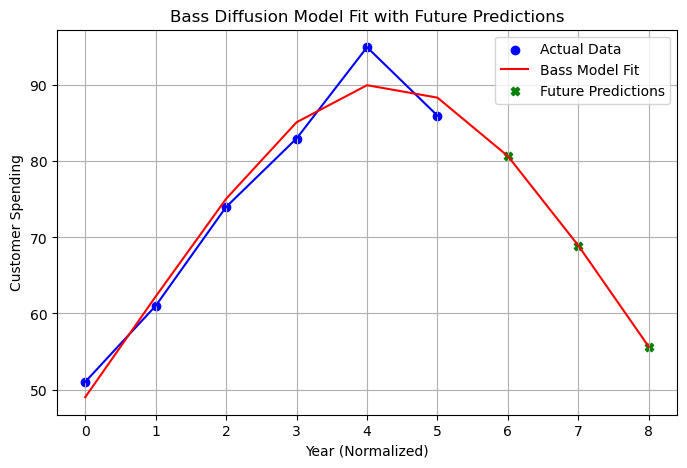

Estimated Parameters:
p (Coefficient of Innovation): 0.0626
q (Coefficient of Imitation): 0.3238
M (Market Potential): 782.61


(0.06259520001576831,
 0.3238497763105583,
 782.6141069517022,
 array([80.6772337 , 68.91625366, 55.61186362]))

In [39]:
fit_bass_model(df)


Estimated number of adopters over time:
Year 0: 49 adopters
Year 1: 111 adopters
Year 2: 186 adopters
Year 3: 271 adopters
Year 4: 361 adopters
Year 5: 450 adopters
Year 6: 530 adopters
Year 7: 599 adopters
Year 8: 655 adopters
Year 9: 698 adopters
Year 10: 730 adopters


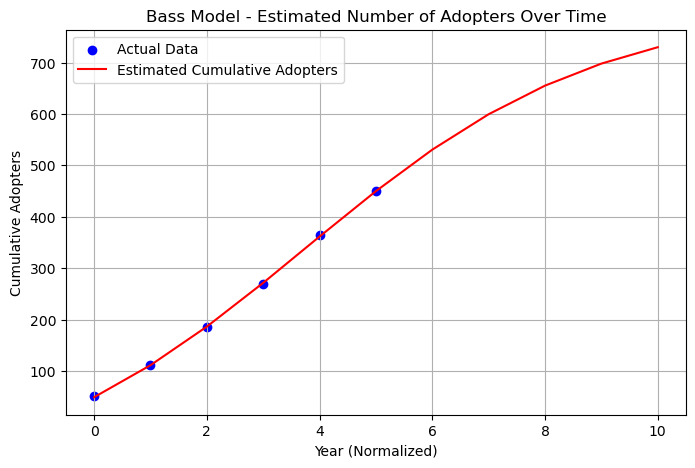

(0.06259520001576831,
 0.3238497763105583,
 782.6141069517022,
 array([ 48.98788656, 111.21267377, 186.28559643, 271.41966922,
        361.42766611, 449.79778306, 530.47501675, 599.39127042,
        655.00313403, 697.85868048, 729.72918319]))

In [40]:
def estimate_adopters_over_time(df, estimated_p=None, estimated_q=None, estimated_M=None):
    t_values = df["Year"].values
    adoption_values = df["Customer Spending"].values
    
    # Use estimated parameters if given, otherwise fit the model
    if estimated_p is None or estimated_q is None or estimated_M is None:
        initial_guess = [0.01, 0.1, max(adoption_values) * 2]  # Fermi estimation
        params, _ = curve_fit(bass_model, t_values, adoption_values, p0=initial_guess, maxfev=10000)
        p_est, q_est, M_est = params
    else:
        p_est, q_est, M_est = estimated_p, estimated_q, estimated_M
    
    # Predict values using the fitted model
    t_pred = np.arange(0, max(t_values) + 6)  # Extend prediction for extra years
    adoption_pred = bass_model(t_pred, p_est, q_est, M_est)

    # Compute cumulative adopters
    cumulative_adopters = np.cumsum(adoption_pred)

    # Print predictions
    print("\nEstimated number of adopters over time:")
    for year, adopters in zip(t_pred, cumulative_adopters):
        print(f"Year {year}: {adopters:.0f} adopters")

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.scatter(t_values, np.cumsum(adoption_values), label="Actual Data", color="blue")
    plt.plot(t_pred, cumulative_adopters, label="Estimated Cumulative Adopters", color="red")
    plt.xlabel("Year (Normalized)")
    plt.ylabel("Cumulative Adopters")
    plt.title("Bass Model - Estimated Number of Adopters Over Time")
    plt.legend()
    plt.grid()
    
    # Save the plot as PNG
    plt.savefig("bass_model_adopters.png", dpi=300, bbox_inches="tight")
    plt.show()

    return p_est, q_est, M_est, cumulative_adopters


estimate_adopters_over_time(df)
